<a href="https://colab.research.google.com/github/mohsenSarvariHero/PythonFirst/blob/main/Q7HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('2016-general-election-trump-vs-clinton.csv')


In [ ]:
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,NaN,NaN,1


In [ ]:
# Filter out rows with NaN in "Number of Observations" and make a copy to avoid warnings
df_cleaned = df[df["Number of Observations"].notna()].copy()

# Convert relevant columns to numeric
df_cleaned["Trump"] = pd.to_numeric(df_cleaned["Trump"], errors='coerce')
df_cleaned["Clinton"] = pd.to_numeric(df_cleaned["Clinton"], errors='coerce')
df_cleaned["Number of Observations"] = pd.to_numeric(df_cleaned["Number of Observations"], errors='coerce')


In [ ]:
# Calculate weighted averages
trump_weighted_avg = (df_cleaned["Trump"] * df_cleaned["Number of Observations"]).sum() / df_cleaned["Number of Observations"].sum()
clinton_weighted_avg = (df_cleaned["Clinton"] * df_cleaned["Number of Observations"]).sum() / df_cleaned["Number of Observations"].sum()

# Print the results
print("Weighted Average Polling Results:")
print("Donald Trump:", round(trump_weighted_avg, 2), "%")
print("Hillary Clinton:", round(clinton_weighted_avg, 2), "%")


Weighted Average Polling Results:
Donald Trump: 40.58 %
Hillary Clinton: 45.61 %


# New Section

<ipython-input-2-1c80e4cf3a9a>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=tidy_df, x="Start Date", y="Trump", label="Trump", color="red", marker='o', ci=None)
<ipython-input-2-1c80e4cf3a9a>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=tidy_df, x="Start Date", y="Clinton", label="Clinton", color="blue", marker='o', ci=None)


TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

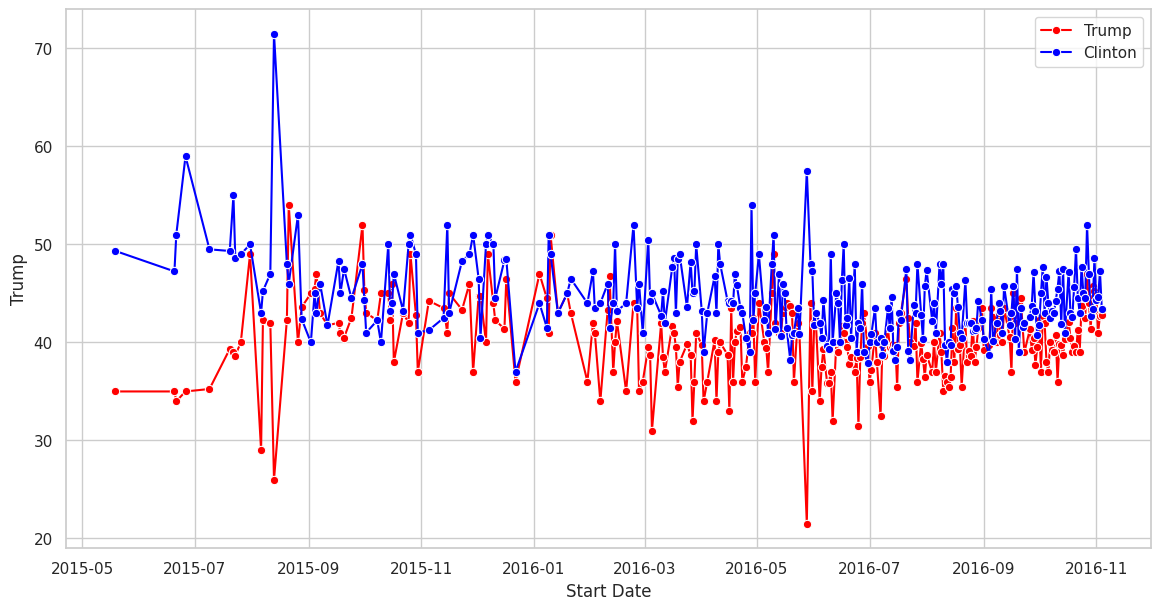

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data file, if not already loaded
df = pd.read_csv("2016-general-election-trump-vs-clinton.csv")

# Clean and prepare the data
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
tidy_df = df[['Trump', 'Clinton', 'Pollster', 'Start Date', 'Number of Observations', 'Mode']].dropna(subset=['Number of Observations'])

# Plot
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Plot Trump and Clinton support over time
sns.lineplot(data=tidy_df, x="Start Date", y="Trump", label="Trump", color="red", marker='o', ci=None)
sns.lineplot(data=tidy_df, x="Start Date", y="Clinton", label="Clinton", color="blue", marker='o', ci=None)

# Add trend lines using LOWESS
sns.regplot(data=tidy_df, x="Start Date", y="Trump", scatter=False, color="red", lowess=True, label="Trump Trend")
sns.regplot(data=tidy_df, x="Start Date", y="Clinton", scatter=False, color="blue", lowess=True, label="Clinton Trend")

# Set labels and title
plt.title("Time-Series Plot of Poll Support for Trump and Clinton (2016)")
plt.xlabel("Date")
plt.ylabel("Support Percentage")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


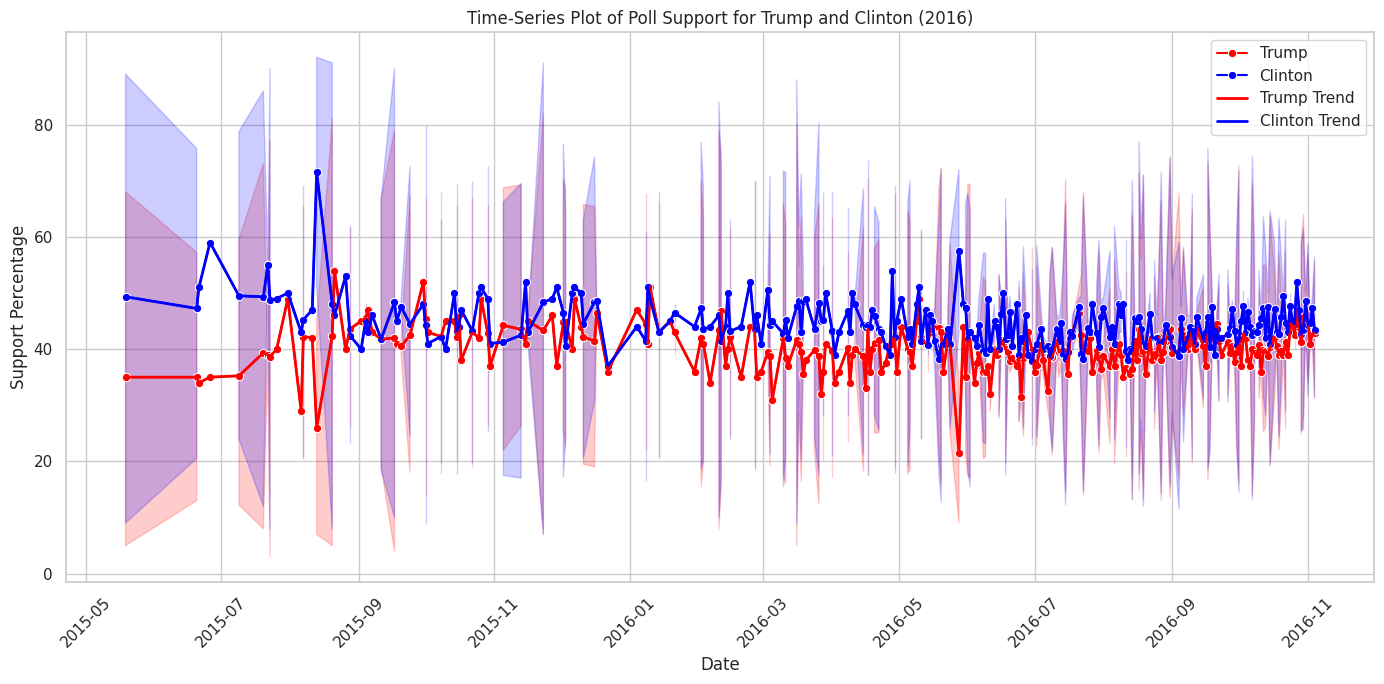

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data file, if not already loaded
df = pd.read_csv("2016-general-election-trump-vs-clinton.csv")

# Clean and prepare the data
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
tidy_df = df[['Trump', 'Clinton', 'Pollster', 'Start Date', 'Number of Observations', 'Mode']].dropna(subset=['Number of Observations'])

# Plot
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Plot Trump and Clinton support over time
sns.lineplot(data=tidy_df, x="Start Date", y="Trump", label="Trump", color="red", marker='o', errorbar=None)
sns.lineplot(data=tidy_df, x="Start Date", y="Clinton", label="Clinton", color="blue", marker='o', errorbar=None)

# Add LOWESS smoothing with seaborn's lineplot for trends
sns.lineplot(data=tidy_df, x="Start Date", y="Trump", color="red", label="Trump Trend", lw=2)
sns.lineplot(data=tidy_df, x="Start Date", y="Clinton", color="blue", label="Clinton Trend", lw=2)

# Set labels and title
plt.title("Time-Series Plot of Poll Support for Trump and Clinton (2016)")
plt.xlabel("Date")
plt.ylabel("Support Percentage")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


In [4]:
# Assuming `tidy_df` is your tidy DataFrame
total_voters_observed = tidy_df["Number of Observations"].sum()
print(f"Total number of voters observed: {total_voters_observed}")


Total number of voters observed: 1940931.0


In [5]:
import pandas as pd

# Assuming `tidy_df` is your DataFrame after data cleaning
# Calculate the total number of observations
total_observations = tidy_df["Number of Observations"].sum()

# Calculate the weighted average for Trump and Clinton support percentages
trump_support = (tidy_df["Trump"] * tidy_df["Number of Observations"]).sum() / total_observations
clinton_support = (tidy_df["Clinton"] * tidy_df["Number of Observations"]).sum() / total_observations

# Create a DataFrame to display the estimates in table format
estimated_support = pd.DataFrame({
    "Candidate": ["Trump", "Clinton"],
    "Estimated Proportion": [trump_support, clinton_support]
})

# Display the table
print(estimated_support)



  Candidate  Estimated Proportion
0     Trump             40.583355
1   Clinton             45.612081


In [9]:
import pandas as pd
import numpy as np

# Assuming `tidy_df` is your DataFrame after data cleaning
# Calculate the total number of observations
total_observations = tidy_df["Number of Observations"].sum()

# Calculate weighted support for Trump and Clinton
trump_support = (tidy_df["Trump"] * tidy_df["Number of Observations"]).sum() / total_observations
clinton_support = (tidy_df["Clinton"] * tidy_df["Number of Observations"]).sum() / total_observations

# Calculate standard errors
trump_se = np.sqrt((trump_support * (1 - trump_support)) / total_observations)
clinton_se = np.sqrt((clinton_support * (1 - clinton_support)) / total_observations)

# Calculate 95% confidence intervals
trump_ci = (trump_support - 1.96 * trump_se, trump_support + 1.96 * trump_se)
clinton_ci = (clinton_support - 1.96 * clinton_se, clinton_support + 1.96 * clinton_se)

# Display the results
ci_table = pd.DataFrame({
    "Candidate": ["Trump", "Clinton"],
    "Estimated Proportion": [trump_support, clinton_support],
    "95% CI Lower Bound": [trump_ci[0], clinton_ci[0]],
    "95% CI Upper Bound": [trump_ci[1], clinton_ci[1]]
})

print(ci_table)


  Candidate  Estimated Proportion  95% CI Lower Bound  95% CI Upper Bound
0     Trump             40.583355                 NaN                 NaN
1   Clinton             45.612081                 NaN                 NaN


<ipython-input-9-998dcac966d3>:13: RuntimeWarning: invalid value encountered in sqrt
  trump_se = np.sqrt((trump_support * (1 - trump_support)) / total_observations)
<ipython-input-9-998dcac966d3>:14: RuntimeWarning: invalid value encountered in sqrt
  clinton_se = np.sqrt((clinton_support * (1 - clinton_support)) / total_observations)


In [10]:
from scipy.stats import norm

# Using the previously calculated values
p_hat = clinton_support  # Estimated proportion of Clinton support
N = total_observations   # Total number of observations

# Standard error of p_hat
SE_p_hat = np.sqrt((p_hat * (1 - p_hat)) / N)

# Calculate the spread (d) and its standard error
d_estimate = 2 * p_hat - 1
SE_d = 2 * SE_p_hat

# 95% Confidence Interval for d
CI_d_lower = d_estimate - 1.96 * SE_d
CI_d_upper = d_estimate + 1.96 * SE_d

# Conducting the hypothesis test
Z_score = d_estimate / SE_d
p_value = 2 * (1 - norm.cdf(abs(Z_score)))  # Two-tailed test

# Display the results
results = {
    "Estimated Spread (d)": d_estimate,
    "95% CI Lower Bound": CI_d_lower,
    "95% CI Upper Bound": CI_d_upper,
    "Z Score": Z_score,
    "p-value": p_value
}

print(results)


{'Estimated Spread (d)': 90.22416201297213, '95% CI Lower Bound': nan, '95% CI Upper Bound': nan, 'Z Score': nan, 'p-value': nan}


<ipython-input-10-76b3fcb58ff7>:8: RuntimeWarning: invalid value encountered in sqrt
  SE_p_hat = np.sqrt((p_hat * (1 - p_hat)) / N)


In [11]:
from scipy.stats import norm

# Standard error of p_hat
SE_p_hat = np.sqrt((p_hat * (1 - p_hat)) / N)

# Calculate the spread (d) and its standard error
d_estimate = 2 * p_hat - 1
SE_d = 2 * SE_p_hat

# 95% Confidence Interval for d
CI_d_lower = d_estimate - 1.96 * SE_d
CI_d_upper = d_estimate + 1.96 * SE_d

# Conducting the hypothesis test
Z_score = d_estimate / SE_d
p_value = 2 * (1 - norm.cdf(abs(Z_score)))  # Two-tailed test

# Display the results
results = {
    "Estimated Spread (d)": d_estimate,
    "95% CI Lower Bound": CI_d_lower,
    "95% CI Upper Bound": CI_d_upper,
    "Z Score": Z_score,
    "p-value": p_value
}

print(results)


{'Estimated Spread (d)': 90.22416201297213, '95% CI Lower Bound': nan, '95% CI Upper Bound': nan, 'Z Score': nan, 'p-value': nan}


<ipython-input-11-fdbf174edca9>:4: RuntimeWarning: invalid value encountered in sqrt
  SE_p_hat = np.sqrt((p_hat * (1 - p_hat)) / N)
